<a href="https://colab.research.google.com/github/nomchanz/graduation_thesis_new/blob/main/NN2000seed(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## 必要なライブラリのimport
import csv
import random
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, BatchNormalization
from keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
## データについて

### データフイルのpath
no_hole_path = 'no_hole_data.csv'
one_hole_size_path = 'one_hole_size_data.csv'
one_hole_position_path = 'one_hole_position_data.csv'
four_holes_size_path = 'four_holes_size_data.csv'
four_holes_position_path = 'four_holes_position_data.csv'
nine_holes_size_path = 'nine_holes_size_data.csv'
nine_holes_position_path = 'nine_holes_position_data.csv'
sixteen_holes_size_path = 'sixteen_holes_size_data.csv'
sixteen_holes_position_path = 'sixteen_holes_position_data.csv'
twentyfive_holes_size_path = 'twentyfive_holes_size_data.csv'
twentyfive_holes_position_path = 'twentyfive_holes_position_data.csv'

#### 穴0データ
with open(no_hole_path) as f0:
  lst_f0 = list(csv.reader(f0))

#### 大きさに関するデータ
with open(one_hole_size_path) as fs1:
  lst_fs1 = list(csv.reader(fs1))
with open(four_holes_size_path) as fs2:
  lst_fs2 = list(csv.reader(fs2))
with open(nine_holes_size_path) as fs3:
  lst_fs3 = list(csv.reader(fs3))
with open(sixteen_holes_size_path) as fs4:
  lst_fs4 = list(csv.reader(fs4))
with open(twentyfive_holes_size_path) as fs5:
  lst_fs5 = list(csv.reader(fs5))

#### 位置に関するデータ
with open(one_hole_position_path) as fp1:
  lst_fp1 = list(csv.reader(fp1))
with open(four_holes_position_path) as fp2:
  lst_fp2 = list(csv.reader(fp2))
with open(nine_holes_position_path) as fp3:
  lst_fp3 = list(csv.reader(fp3))
with open(sixteen_holes_position_path) as fp4:
  lst_fp4 = list(csv.reader(fp4))
with open(twentyfive_holes_position_path) as fp5:
  lst_fp5 = list(csv.reader(fp5))

n = 2000
a = 1

random.seed(a)

lst_fs1 = random.sample(lst_fs1, int(n/5))
lst_fs2 = random.sample(lst_fs2, int(n/5))
lst_fs3 = random.sample(lst_fs3, int(n/5))
lst_fs4 = random.sample(lst_fs4, int(n/5))
lst_fs5 = random.sample(lst_fs5, int(n/5))
lst_fp1 = random.sample(lst_fp1, int(n/5))
lst_fp2 = random.sample(lst_fp2, int(n/5))
lst_fp3 = random.sample(lst_fp3, int(n/5))
lst_fp4 = random.sample(lst_fp4, int(n/5))
lst_fp5 = random.sample(lst_fp5, int(n/5))

lst_f0 = [r[:-1] for r in lst_f0]
lst_x_fs1 = [r[0] for r in lst_fs1]
lst_x_fs2 = [r[0] for r in lst_fs2]
lst_x_fs3 = [r[0] for r in lst_fs3]
lst_x_fs4 = [r[0] for r in lst_fs4]
lst_x_fs5 = [r[0] for r in lst_fs5]
lst_x_fp1 = [r[0] for r in lst_fp1]
lst_x_fp2 = [r[0] for r in lst_fp2]
lst_x_fp3 = [r[0] for r in lst_fp3]
lst_x_fp4 = [r[0] for r in lst_fp4]
lst_x_fp5 = [r[0] for r in lst_fp5]
lst_y1 = [r[1:-1] for r in lst_fp1]
lst_y2 = [r[1:-1] for r in lst_fp2]
lst_y3 = [r[1:-1] for r in lst_fp3]
lst_y4 = [r[1:-1] for r in lst_fp4]
lst_y5 = [r[1:-1] for r in lst_fp5]

lst_x_fs = lst_x_fs1 + lst_x_fs2 + lst_x_fs3 + lst_x_fs4 + lst_x_fs5
lst_x_fp = lst_x_fp1 + lst_x_fp2 + lst_x_fp3 + lst_x_fp4 + lst_x_fp5
lst_x = lst_x_fs + lst_x_fp
lst_y = lst_y1 + lst_y2 + lst_y3 + lst_y4 + lst_y5

lst_f0 = np.array(lst_f0, dtype=float)
lst_x = np.array(lst_x, dtype=int)
lst_y = np.array(lst_y, dtype=float)

lst_x = lst_x.reshape(2,n)
lst_x = lst_x.T
lst_y = lst_y - lst_f0

### train用とtest用に分割(4:1)
x_train, x_test, y_train, y_test = train_test_split(lst_x, lst_y, train_size= 0.8, test_size=0.2)

#x_train = x_train.reshape(int(n*0.8),2,1)
#x_test = x_test.reshape(int(n*0.2),2,1)
print(x_train.shape)
print(x_test.shape)

(1600, 2)
(400, 2)


In [3]:
x_train.shape[1]

2

In [4]:
## NN

### modelの作成
model = Sequential()
### 全結合層
model.add(Dense(10, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(25, activation='relu'))
model.add(Dense(50))
### バッチ正規化層
#model.add(BatchNormalization(epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
model.compile(loss='mse', optimizer=adam, metrics=['mae'])

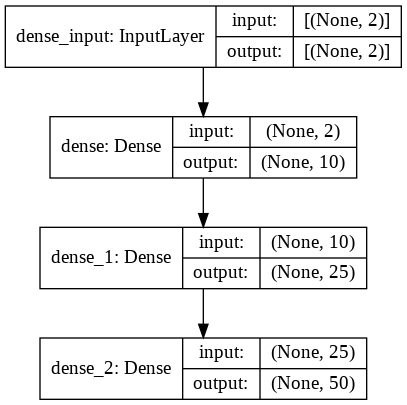

In [5]:
from keras.utils import plot_model
plot_model(model, show_shapes = True)

In [6]:
# 学習
epochs = 4000
batch_size = 64
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

ストリーミング出力は最後の 5000 行に切り捨てられました。
Epoch 1501/4000
25/25 [==============================] - 0s 8ms/step - loss: 0.1132 - mae: 0.1270 - val_loss: 0.1988 - val_mae: 0.1675
Epoch 1502/4000
25/25 [==============================] - 0s 3ms/step - loss: 0.1219 - mae: 0.1356 - val_loss: 0.2020 - val_mae: 0.1684
Epoch 1503/4000
25/25 [==============================] - 0s 3ms/step - loss: 0.1110 - mae: 0.1328 - val_loss: 0.2021 - val_mae: 0.1701
Epoch 1504/4000
25/25 [==============================] - 0s 3ms/step - loss: 0.1025 - mae: 0.1321 - val_loss: 0.1983 - val_mae: 0.1662
Epoch 1505/4000
25/25 [==============================] - 0s 3ms/step - loss: 0.1326 - mae: 0.1383 - val_loss: 0.2013 - val_mae: 0.1653
Epoch 1506/4000
25/25 [==============================] - 0s 3ms/step - loss: 0.1615 - mae: 0.1365 - val_loss: 0.1992 - val_mae: 0.1649
Epoch 1507/4000
25/25 [==============================] - 0s 3ms/step - loss: 0.1261 - mae: 0.1349 - val_loss: 0.2012 - val_mae: 0.1690
Epoch 1508/4000
25/25 [

In [7]:
# モデルの評価
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

13/13 [==============================] - 0s 2ms/step - loss: 0.1912 - mae: 0.1560
Test loss: 0.19118711352348328
Test mae: 0.1559947282075882


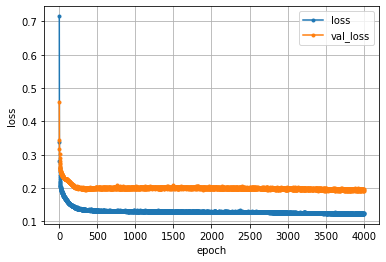

In [8]:
# 学習経過の可視化
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
for i in range(900):
  if max(loss)>2: 
    loss = loss[1:]
    val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

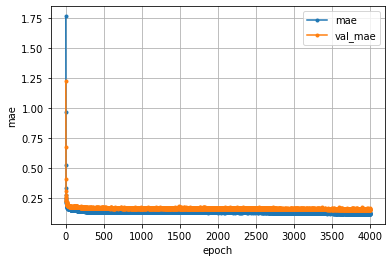

In [9]:
# 学習経過の可視化
mae     = history.history['mae']
val_mae = history.history['val_mae']

nb_epoch = len(mae)
for i in range(900):
  if max(mae)>2: 
    mae = mae[1:]
    val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae,     marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [10]:
model.save(str(n)+"_random.seed("+str(a)+")_NN1.h5")

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
x_train_n = scaler_x.fit_transform(x_train)
x_test_n = scaler_x.fit_transform(x_test) 

In [12]:
x_train_n

array([[0.5       , 0.625     ],
       [0.5       , 0.5       ],
       [0.5       , 0.625     ],
       ...,
       [0.        , 0.41666667],
       [0.5       , 0.375     ],
       [0.25      , 0.08333333]])

In [13]:
x_test_n

array([[1.        , 0.125     ],
       [1.        , 0.5       ],
       [0.75      , 0.54166667],
       [0.        , 0.125     ],
       [0.25      , 0.70833333],
       [1.        , 0.91666667],
       [1.        , 0.5       ],
       [0.75      , 0.79166667],
       [1.        , 0.41666667],
       [1.        , 0.54166667],
       [1.        , 0.41666667],
       [0.5       , 0.04166667],
       [0.25      , 0.25      ],
       [0.75      , 0.41666667],
       [1.        , 0.16666667],
       [0.25      , 0.875     ],
       [1.        , 0.20833333],
       [0.5       , 0.04166667],
       [0.        , 0.04166667],
       [0.5       , 0.54166667],
       [0.        , 0.20833333],
       [0.        , 0.95833333],
       [0.5       , 0.54166667],
       [0.25      , 0.58333333],
       [1.        , 0.75      ],
       [0.75      , 0.45833333],
       [0.5       , 0.875     ],
       [0.75      , 0.95833333],
       [1.        , 0.91666667],
       [0.        , 0.5       ],
       [1.

In [14]:
## NN

### modelの作成
model_2 = Sequential()
### 全結合層
model_2.add(Dense(10, activation='relu', input_dim=x_train.shape[1]))
model_2.add(Dense(25, activation='relu'))
model_2.add(Dense(50))
### バッチ正規化層
#model.add(BatchNormalization(epsilon=0.001, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
model_2.compile(loss='mse', optimizer=adam, metrics=['mae'])

In [15]:
# 学習
epochs = 4000
batch_size = 64
history = model_2.fit(x_train_n, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test_n, y_test))

ストリーミング出力は最後の 5000 行に切り捨てられました。
Epoch 1501/4000
25/25 [==============================] - 0s 3ms/step - loss: 0.1498 - mae: 0.1345 - val_loss: 0.1955 - val_mae: 0.1555
Epoch 1502/4000
25/25 [==============================] - 0s 3ms/step - loss: 0.1212 - mae: 0.1171 - val_loss: 0.1953 - val_mae: 0.1548
Epoch 1503/4000
25/25 [==============================] - 0s 3ms/step - loss: 0.0986 - mae: 0.1173 - val_loss: 0.1958 - val_mae: 0.1560
Epoch 1504/4000
25/25 [==============================] - 0s 3ms/step - loss: 0.1079 - mae: 0.1154 - val_loss: 0.1955 - val_mae: 0.1557
Epoch 1505/4000
25/25 [==============================] - 0s 4ms/step - loss: 0.1115 - mae: 0.1201 - val_loss: 0.1969 - val_mae: 0.1586
Epoch 1506/4000
25/25 [==============================] - 0s 3ms/step - loss: 0.1601 - mae: 0.1309 - val_loss: 0.1972 - val_mae: 0.1560
Epoch 1507/4000
25/25 [==============================] - 0s 3ms/step - loss: 0.1215 - mae: 0.1264 - val_loss: 0.1968 - val_mae: 0.1570
Epoch 1508/4000
25/25 [

In [16]:
# モデルの評価
score = model_2.evaluate(x_test_n, y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

13/13 [==============================] - 0s 1ms/step - loss: 0.1937 - mae: 0.1503
Test loss: 0.19374045729637146
Test mae: 0.15030884742736816


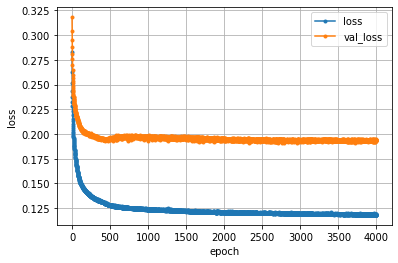

In [17]:
# 学習経過の可視化
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
for i in range(900):
  if max(loss)>2: 
    loss = loss[1:]
    val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

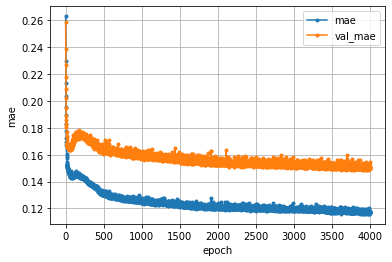

In [18]:
# 学習経過の可視化
mae     = history.history['mae']
val_mae = history.history['val_mae']

nb_epoch = len(mae)
for i in range(900):
  if max(mae)>2: 
    mae = mae[1:]
    val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae,     marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [19]:
model_2.save(str(n)+"_random.seed("+str(a)+")_NN_n.h5")